In [79]:
#Import packages
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

In [71]:
#Read in dataset
df = pd.read_csv('./Phishing.csv')

First we generate a summary of the columns Results.  
We use a Counter to get the number of times a certain value occurs in results and then convert this outcome into a DataFrame.

In [201]:
#Generate summary of column Results
phishing_results = dict(Counter(df['Result']))
ds = pd.Series(phishing_results, name = 'Num_Observations')
ds.index.name = 'Class'
phishing_summary = ds.reset_index()
phishing_summary

,Class,Num_Observations
0,-1,4898
1,1,6157


Next we visualize this phishing_summary DataFrame so that we can more easily see the relative counts of each email type. 

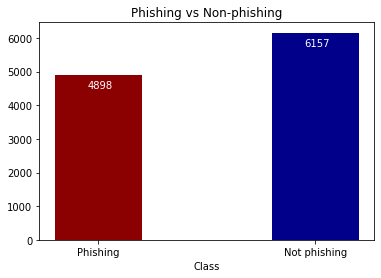

In [206]:
ps = phishing_summary
fig, ax = plt.subplots()
ax.bar(ps.Class,ps.Num_Observations, label = ps.Class, color = ['darkred','darkblue'])
ax.set_xticks(ps.Class)
ax.set_xticklabels(['Phishing', 'Not phishing'])
ax.set_xlabel('Class')
plt.title('Phishing vs Non-phishing')
for index, row in ps.iterrows():
    ax.text(row['Class']-0.1,row['Num_Observations']-400,str(row['Num_Observations']), color='w')
plt.show()

Next we look at the dataset as a whole

In [142]:
df.shape

(11055, 31)

In [143]:
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


We can use the Pandas describe function to produce a general summary of each column

In [207]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
having_IP_Address,11055.0,0.313795,0.949534,-1.0,-1.0,1.0,1.0,1.0
URL_Length,11055.0,-0.633198,0.766095,-1.0,-1.0,-1.0,-1.0,1.0
Shortining_Service,11055.0,0.738761,0.673998,-1.0,1.0,1.0,1.0,1.0
having_At_Symbol,11055.0,0.700588,0.713598,-1.0,1.0,1.0,1.0,1.0
double_slash_redirecting,11055.0,0.741474,0.671011,-1.0,1.0,1.0,1.0,1.0
Prefix_Suffix,11055.0,-0.734962,0.678139,-1.0,-1.0,-1.0,-1.0,1.0
having_Sub_Domain,11055.0,0.063953,0.817518,-1.0,-1.0,0.0,1.0,1.0
SSLfinal_State,11055.0,0.250927,0.911892,-1.0,-1.0,1.0,1.0,1.0
Domain_registeration_length,11055.0,-0.336771,0.941629,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11055.0,0.628584,0.777777,-1.0,1.0,1.0,1.0,1.0


In [200]:
df.dtypes

having_IP_Address              int64
URL_Length                     int64
Shortining_Service             int64
having_At_Symbol               int64
double_slash_redirecting       int64
Prefix_Suffix                  int64
having_Sub_Domain              int64
SSLfinal_State                 int64
Domain_registeration_length    int64
Favicon                        int64
port                           int64
HTTPS_token                    int64
Request_URL                    int64
URL_of_Anchor                  int64
Links_in_tags                  int64
SFH                            int64
Submitting_to_email            int64
Abnormal_URL                   int64
Redirect                       int64
on_mouseover                   int64
RightClick                     int64
popUpWidnow                    int64
Iframe                         int64
age_of_domain                  int64
DNSRecord                      int64
web_traffic                    int64
Page_Rank                      int64
G